In [2]:
#Regresion logistica para predicciones bancarias
import pandas
import numpy
import matplotlib.pyplot as plt

In [3]:
data=pandas.read_csv(r"D:\Estudiar\Python\MLData\bank\bank.csv",sep=";")

In [4]:
data.head()
data.shape

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
data["y"]=(data["y"]=="yes").astype(int)

In [7]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
data["education"]=numpy.where(data["education"]=="basic.4y","Basic",data["education"])
data["education"]=numpy.where(data["education"]=="basic.6y","Basic",data["education"])
data["education"]=numpy.where(data["education"]=="basic.9y","Basic",data["education"])
data["education"]=numpy.where(data["education"]=="high.school","High School",data["education"])
data["education"]=numpy.where(data["education"]=="professional.course","Profesional Course",data["education"])
data["education"]=numpy.where(data["education"]=="university.degree","University Degree",data["education"])
data["education"]=numpy.where(data["education"]=="illiterate","Illiterate",data["education"])
data["education"]=numpy.where(data["education"]=="unknown","Unknown",data["education"])

In [9]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [10]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


<AxesSubplot:xlabel='education'>

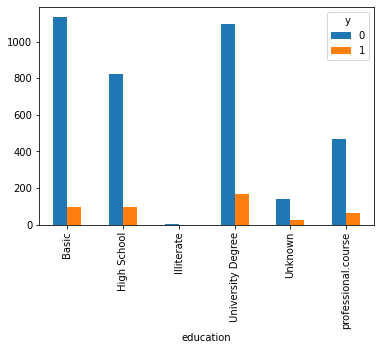

In [22]:
%matplotlib inline
pandas.crosstab(data.education,data.y).plot(kind="bar")

<AxesSubplot:xlabel='marital'>

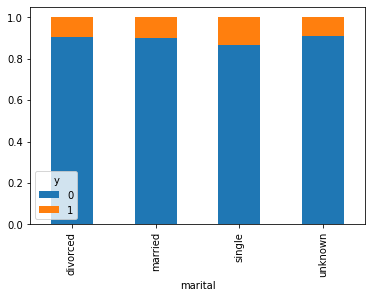

In [27]:
table=pandas.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='day_of_week'>

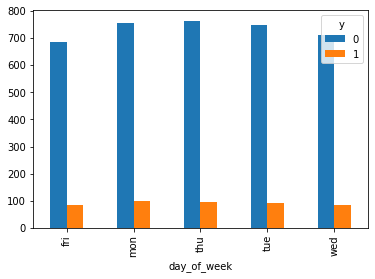

In [30]:
%matplotlib inline
pandas.crosstab(data.day_of_week,data.y).plot(kind="bar")

<AxesSubplot:xlabel='month'>

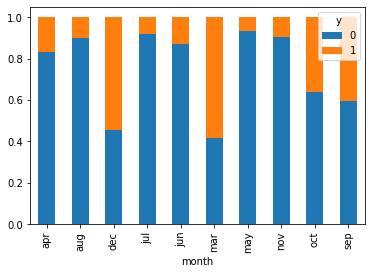

In [31]:
table=pandas.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='month'>

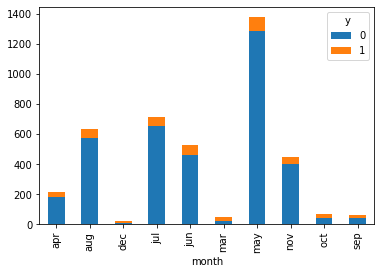

In [36]:
table=pandas.crosstab(data.month,data.y)
table.plot(kind="bar",stacked=True)

<AxesSubplot:>

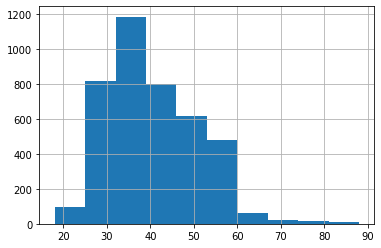

In [38]:
%matplotlib inline
data.age.hist()

<AxesSubplot:xlabel='age'>

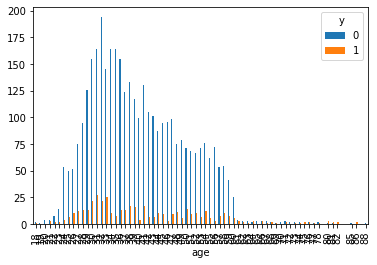

In [40]:
%matplotlib inline
pandas.crosstab(data.age,data.y).plot(kind="bar")

In [116]:
#conversion de las variables categoricas

In [11]:
categories=["job","default","marital","education","housing","loan","contact","month","day_of_week","poutcome"]
for category in categories:
    cat_list="cat"+"_"+category
    cat_dummies=pandas.get_dummies(data[category],prefix=cat_list)
    data_new=data.join(cat_dummies)
    data=data_new

In [12]:
data_vars=data.columns.values.tolist()

In [13]:
categories

['job',
 'default',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [14]:
to_keep=[v for v in data_vars if v not in categories]

In [15]:
bank_data=data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'cat_job_admin.', 'cat_job_blue-collar', 'cat_job_entrepreneur',
       'cat_job_housemaid', 'cat_job_management', 'cat_job_retired',
       'cat_job_self-employed', 'cat_job_services', 'cat_job_student',
       'cat_job_technician', 'cat_job_unemployed', 'cat_job_unknown',
       'cat_default_no', 'cat_default_unknown', 'cat_default_yes',
       'cat_marital_divorced', 'cat_marital_married',
       'cat_marital_single', 'cat_marital_unknown', 'cat_education_Basic',
       'cat_education_High School', 'cat_education_Illiterate',
       'cat_education_Profesional Course',
       'cat_education_University Degree', 'cat_education_Unknown',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellular', 'cat_contact_telephone', 'cat_month_apr',


In [16]:
bank_data_vars=bank_data.columns.values.tolist()
y=["y"]
x=[v for v in bank_data_vars if v not in y]

In [17]:
#seleccion de rasgos para el modelo
n=12

In [18]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [19]:
lr=LogisticRegression()

In [20]:
rfe=RFE(lr,n)
rfe=rfe.fit(bank_data[x],bank_data[y].values.ravel())

In [21]:
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False  True False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False False False False False False False False  True False
  True]


In [22]:
print(rfe.ranking_)
print(len(rfe.ranking_.tolist()))

[30 43 18 46  1 17 25 22  1 37  3 12  8 41 11  1  9 26  1  2  1 47 29 32
 50 16 33 28 49 24 13 48 19 36  5  6 15 45 14 20 27  7  4 40 21  1  1  1
  1  1 23 39 44 42 38 35 31 10  1 34  1]
61


In [23]:
z=zip(x,rfe.support_,rfe.ranking_)#correct
list(z)

[('age', False, 30),
 ('duration', False, 43),
 ('campaign', False, 18),
 ('pdays', False, 46),
 ('previous', True, 1),
 ('emp.var.rate', False, 17),
 ('cons.price.idx', False, 25),
 ('cons.conf.idx', False, 22),
 ('euribor3m', True, 1),
 ('nr.employed', False, 37),
 ('cat_job_admin.', False, 3),
 ('cat_job_blue-collar', False, 12),
 ('cat_job_entrepreneur', False, 8),
 ('cat_job_housemaid', False, 41),
 ('cat_job_management', False, 11),
 ('cat_job_retired', True, 1),
 ('cat_job_self-employed', False, 9),
 ('cat_job_services', False, 26),
 ('cat_job_student', True, 1),
 ('cat_job_technician', False, 2),
 ('cat_job_unemployed', True, 1),
 ('cat_job_unknown', False, 47),
 ('cat_default_no', False, 29),
 ('cat_default_unknown', False, 32),
 ('cat_default_yes', False, 50),
 ('cat_marital_divorced', False, 16),
 ('cat_marital_married', False, 33),
 ('cat_marital_single', False, 28),
 ('cat_marital_unknown', False, 49),
 ('cat_education_Basic', False, 24),
 ('cat_education_High School', Fal

In [24]:
cols=["previous","euribor3m","cat_job_retired","cat_job_student","cat_job_unemployed","cat_month_dec","cat_month_jul","cat_month_jun","cat_month_mar","cat_month_may","cat_poutcome_failure","cat_poutcome_success"]

In [25]:
X=bank_data[cols]
Y=bank_data["y"]

In [26]:
import statsmodels.api as sm

In [27]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.279611
         Iterations 7


In [28]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             Pseudo R-squared:  0.191      
Dependent Variable:  y                 AIC:               2327.4362  
Date:                2021-01-29 14:00  BIC:               2403.3166  
No. Observations:    4119              Log-Likelihood:    -1151.7    
Df Model:            11                LL-Null:           -1422.9    
Df Residuals:        4107              LLR p-value:       2.8578e-109
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      7.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous              0.3549   0.1413   2.5126 0.0120  0.0781  0.6318
euribor3m            -0.6330   0.0263 -24.0815 0.0000 -0.6845 -0.5814
cat_job_retired       0.0820   0.2203   0.3723 0.7097 -0.3497  0.5137
cat_job_student      -0.0169   0.2937  -0.0575 0.9541 -0.5924  0.5587
cat_job_unemployed    0.1552   0.3021   0.5139 0.6073 -0.4368  0.7473
cat_month_dec         0.6520   0.4664   1.3978 0.1622 -0.2622  1.5661
cat_month_jul         0.3282   0.1838   1.7855 0.0742 -0.0321  0.6884
cat_month_jun         0.3270   0.1690   1.9352 0.0530 -0.0042  0.6582
cat_month_mar         1.0340   0.3155   3.2776 0.0010  0.4157  1.6524
cat_month_may        -1.0635   0.1260  -8.4385 0.0000 -1.3105 -0.8165
cat_poutcome_failure -1.0701   0.2463  -4.3443 0.0000 -1.5528 -0.5873
cat_poutcome_success  0.7554   0.2888   2.6155 0.0089  0.1893  1.3215
=====================================================================

"""

In [29]:
#implementacion del modelo en python con scikit-learn

In [30]:
from sklearn import linear_model

In [31]:
logit_model=linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

In [32]:
logit_model.score(X,Y)

0.9026462733673222

In [33]:
pandas.DataFrame(list(zip(X.columns,numpy.transpose(logit_model.coef_))))

,0,1
0,previous,[0.3933522416773235]
1,euribor3m,[-0.5020960568413418]
2,cat_job_retired,[0.3172320439815368]
3,cat_job_student,[0.20128275884128816]
4,cat_job_unemployed,[0.2793187319783767]
5,cat_month_dec,[0.7938596310499583]
6,cat_month_jul,[0.3612411704729883]
7,cat_month_jun,[0.48107825443126323]
8,cat_month_mar,[1.2218134984051177]
9,cat_month_may,[-0.7512150878481595]


In [34]:
#Validacion del modelo logistico

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [37]:
lm=linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression()

In [38]:
probs=lm.predict_proba(X_test)#si la probabilidad es menor a 0.5 es 0

In [39]:
probs

array([[0.93699338, 0.06300662],
       [0.88536858, 0.11463142],
       [0.91972308, 0.08027692],
       ...,
       [0.71727505, 0.28272495],
       [0.97925302, 0.02074698],
       [0.25827148, 0.74172852]])

In [40]:
prediction=lm.predict(X_test)

In [41]:
print(str(sum(prediction)))
print(str(sum(Y_test)))#con threshold=0.5

34
122


In [42]:
prob=probs[:,1]
prob_df=pandas.DataFrame(prob)
threshold=0.25
prob_df["prediction"]=numpy.where(prob_df[0]>threshold,1,0)
prob_df.head()
sum(prob_df["prediction"])

141

In [43]:
pandas.crosstab(prob_df.prediction,columns="count")

col_0,count
prediction,
0,1095
1,141


In [44]:
122/len(prob_df)*100

9.870550161812297

In [45]:
from sklearn import metrics

In [46]:
metrics.accuracy_score(Y_test,prediction)#usando el metodo de separar en train y test

0.9061488673139159

In [1]:
#Validacion cruzada

In [47]:
from sklearn.model_selection import cross_val_score

In [72]:
scores=cross_val_score(linear_model.LogisticRegression(),X,Y,scoring="accuracy",cv=5)

In [73]:
scores

array([0.91140777, 0.90048544, 0.90533981, 0.89441748, 0.90036452])

In [74]:
scores.mean()

0.9024030010970993

In [75]:
#MAtrices de Confusion y curvas ROC

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [77]:
lm=linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression()

In [78]:
probs=lm.predict_proba(X_test)

In [79]:
prob=probs[:,1]
prob_df=pandas.DataFrame(prob)
threshold=0.1
prob_df["prediction"]=numpy.where(prob_df[0]>threshold,1,0)
prob_df["actual"]=list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.063007,0,0
1,0.114631,1,0
2,0.080277,0,0
3,0.059913,0,0
4,0.064444,0,0


In [82]:
confusion_matrix=pandas.crosstab(prob_df.prediction,prob_df.actual)

In [83]:
confusion_matrix

actual,0,1
prediction,,
0,842,45
1,272,77


In [86]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]

In [87]:
sens=TP/(TP+FN)

In [89]:
espc_1=1-TN/(TN+FP)

In [90]:
sens, espc

(0.22063037249283668, 0.050732807215332576)

In [140]:
#threshold=[0.04,0.05,0.07,0.10,0.12,0.15,0.18,0.20,0.25]
threshold=[((i*0.01)+.04) for i in range(40)]
sensivities=[1]
especifities_1=[1]
for t in threshold:
    prob_df["prediction"]=numpy.where(prob_df[0]>t,1,0)
    prob_df["actual"]=list(Y_test)
    confusion_matrix=pandas.crosstab(prob_df.prediction,prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    sensivities.append(TP/(TP+FN))
    especifities_1.append(1-TN/(TN+FP))
sensivities.append(0)
especifities_1.append(0)

In [141]:
import matplotlib.pyplot as plt

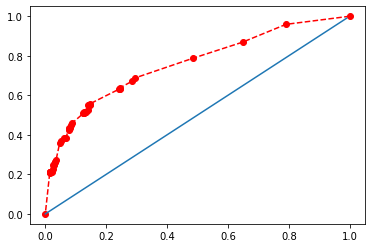

In [142]:
%matplotlib inline
plt.plot(especifities_1,sensivities,marker="o",linestyle="--",color="r")
y=[i*0.01 for i in range(100)]
x=y
plt.plot(x,y)

In [164]:
from sklearn import metrics
from ggplot import *

In [151]:
espc_1,sensit, _ =metrics.roc_curve(Y_test,prob)

In [153]:
df=pandas.DataFrame(
    {
        "x":espc_1,
        "y":sensit
    }
)

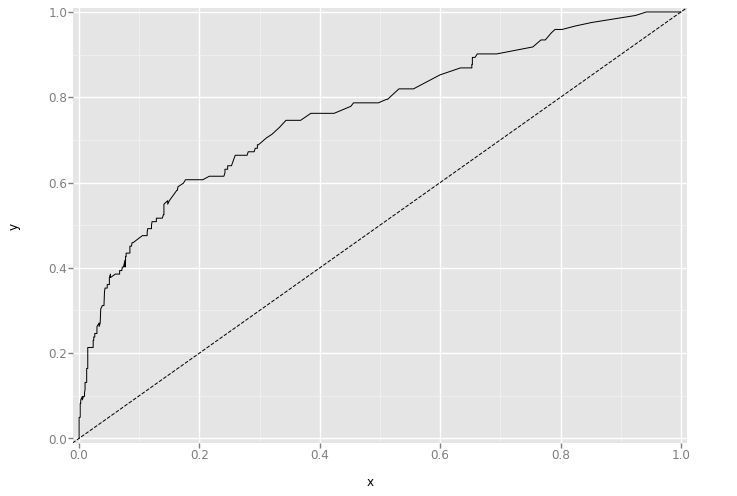

<ggplot: (136212629917)>

In [169]:
ggplot(df,aes(x="x",y="y")) +geom_line() +geom_abline(linetype="dashed") +xlim(-0.01,1.01)+ylim(-0.01,1.01)

In [158]:
auc=metrics.auc(espc_1,sensit)
auc

0.7624974247284928

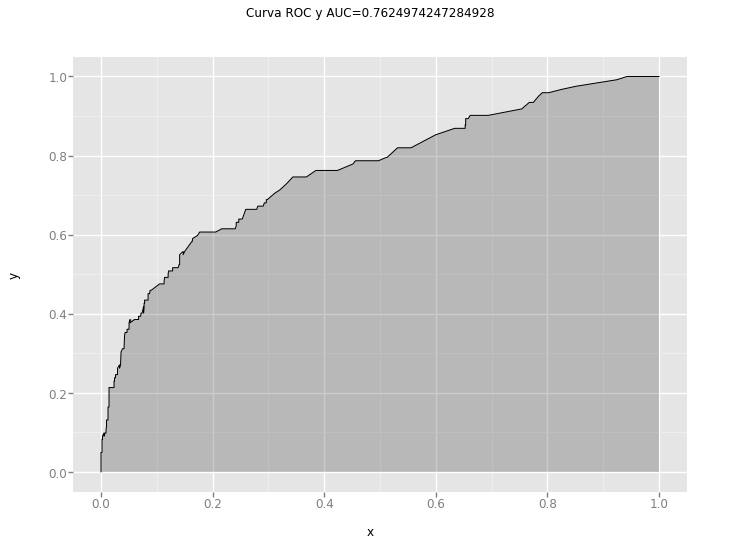

<ggplot: (136212599691)>

In [168]:
ggplot(df,aes(x="x",y="y"))  + geom_area(alpha=0.25) + geom_line(aes(y="y")) + ggtitle("Curva ROC y AUC=%s"%str(auc))